# Import

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
from bayesian_network import BayesianNetwork

# Prepare Data

| 英語 | 日本語 |
|------|--------|
| Survived | 生存 |
| Pclass | チケットクラス |
| Name | 名前 |
| Sex | 性別 |
| Age | 年齢 |
| SibSp | 兄弟姉妹/配偶者の数 |
| Parch | 親/子供の数 |
| Ticket | チケット番号 |
| Fare | 運賃 |
| Embarked | 乗船した港 |

In [4]:
df_original = pd.read_csv("./data/taitanic.csv")
df_original

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
categorical_columns = ["Survived", "Pclass", "Sex", "Embarked"]
categorical_df = df_original.loc[:, [*categorical_columns]]
categorical_df.head()

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


In [6]:
def fill_nan_rondom_value(df, column):
    unique_categories = df[column].dropna().unique()
    df[column].fillna(pd.Series(np.random.choice(unique_categories, size=len(df)), index=df.index), inplace=True)

In [7]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    fill_nan_rondom_value(categorical_df, column)
    categorical_df[column] = label_encoder.fit_transform(categorical_df[column])+1
categorical_df.head()

,Survived,Pclass,Sex,Embarked
0,1,3,2,3
1,2,1,1,1
2,2,3,1,3
3,2,1,1,3
4,1,3,2,3


In [8]:
numerical_columns = ["Age", "Fare", "SibSp", "Parch"]
numerical_df = df_original.loc[:, [*numerical_columns]]
numerical_df.head()

,Age,Fare,SibSp,Parch
0,22.0,7.2500,1,0
1,38.0,71.2833,1,0
2,26.0,7.9250,0,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0


In [9]:
def fill_nan_mean_value(df, column):
    df[column] = df[column].fillna(df[column].mean())

In [10]:
bin_df = pd.DataFrame([])
n_bin = 3
for column in numerical_columns:
    fill_nan_mean_value(numerical_df, column)
    bin_df[column], _ = pd.cut(numerical_df[column], n_bin, labels=np.arange(n_bin)+1, retbins=True)
bin_df.head()

,Age,Fare,SibSp,Parch
0,1,1,1,1
1,2,1,1,1
2,1,1,1,1
3,2,1,1,1
4,2,1,1,1


In [11]:
bin_df = pd.concat([categorical_df, bin_df], axis=1)
bin_df.head()

,Survived,Pclass,Sex,Embarked,Age,Fare,SibSp,Parch
0,1,3,2,3,1,1,1,1
1,2,1,1,1,2,1,1,1
2,2,3,1,3,1,1,1,1
3,2,1,1,3,2,1,1,1
4,1,3,2,3,2,1,1,1


In [12]:
bin_df = bin_df.loc[:, bin_df.columns[::-1].to_numpy()]
bin_df = bin_df.dropna()
bin_df

,Parch,SibSp,Fare,Age,Embarked,Sex,Pclass,Survived
0,1,1,1,1,3,2,3,1
1,1,1,1,2,1,1,1,2
2,1,1,1,1,3,1,3,2
3,1,1,1,2,3,1,1,2
4,1,1,1,2,3,2,3,1
...,...,...,...,...,...,...,...,...
886,1,1,1,2,3,2,2,1
887,1,1,1,1,3,1,1,2
888,1,1,1,2,3,1,3,1
889,1,1,1,1,1,2,1,2


# Main

In [13]:
bayesian_network = BayesianNetwork(bin_df=bin_df, n_dim_total=3)

In [14]:
connect_df_dict = bayesian_network.analyze_connection()

                     DIM0                     
----------------------------------------------------
              Collect ConnectionInfos               
----------------------------------------------------
Parch , SibSp | [] -> is connecting: False [0.93]
Parch , Fare | [] -> is connecting: False [0.37]
Parch , Age | [] -> is connecting: False [0.06]
Parch , Embarked | [] -> is connecting: False [0.54]
Parch , Sex | [] -> is connecting: True [0.01]
Parch , Pclass | [] -> is connecting: False [0.21]
Parch , Survived | [] -> is connecting: False [0.52]
SibSp , Fare | [] -> is connecting: False [0.11]
SibSp , Age | [] -> is connecting: True [0.00]
SibSp , Embarked | [] -> is connecting: True [0.01]
SibSp , Sex | [] -> is connecting: False [0.31]
SibSp , Pclass | [] -> is connecting: True [0.00]
SibSp , Survived | [] -> is connecting: True [0.00]
Fare , Age | [] -> is connecting: False [0.54]
Fare , Embarked | [] -> is connecting: True [0.00]
Fare , Sex | [] -> is connecting: True [0.04]
F

In [15]:
closeness_df_dict = bayesian_network.analyze_closeness(target_col="Survived")

# Result

## Funcs

In [16]:
def highlight_cell(val):
    if val == 0:
        hex = ''
    else:
        normalized_rgb = plt.colormaps["plasma"]((val-1)/2)
        rgb = tuple([int(255 * x) for x in normalized_rgb])
        hex = '#{:02x}{:02x}{:02x}'.format(*rgb)
        
    return f'background-color: {hex}'

## Table

In [17]:
for label, connect_df in connect_df_dict.items():
    print(f"=========================== {label} ===========================")
    display(connect_df.astype(int).style.applymap(highlight_cell))
    print()

=========================== Init ===========================


,Parch,SibSp,Fare,Age,Embarked,Sex,Pclass,Survived
Parch,0,1,1,1,1,1,1,1
SibSp,0,0,1,1,1,1,1,1
Fare,0,0,0,1,1,1,1,1
Age,0,0,0,0,1,1,1,1
Embarked,0,0,0,0,0,1,1,1
Sex,0,0,0,0,0,0,1,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level0 ===========================


,Parch,SibSp,Fare,Age,Embarked,Sex,Pclass,Survived
Parch,0,0,0,0,0,1,0,0
SibSp,0,0,0,1,1,0,1,1
Fare,0,0,0,0,1,1,1,1
Age,0,0,0,0,1,0,1,0
Embarked,0,0,0,0,0,1,1,1
Sex,0,0,0,0,0,0,1,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level1 ===========================


,Parch,SibSp,Fare,Age,Embarked,Sex,Pclass,Survived
Parch,0,0,0,0,0,1,0,0
SibSp,0,0,0,1,0,0,1,1
Fare,0,0,0,0,0,0,1,1
Age,0,0,0,0,1,0,1,0
Embarked,0,0,0,0,0,0,1,1
Sex,0,0,0,0,0,0,1,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level2 ===========================


,Parch,SibSp,Fare,Age,Embarked,Sex,Pclass,Survived
Parch,0,0,0,0,0,1,0,0
SibSp,0,0,0,1,0,0,1,1
Fare,0,0,0,0,0,0,1,1
Age,0,0,0,0,1,0,1,0
Embarked,0,0,0,0,0,0,1,1
Sex,0,0,0,0,0,0,1,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level3 ===========================


,Parch,SibSp,Fare,Age,Embarked,Sex,Pclass,Survived
Parch,0,0,0,0,0,1,0,0
SibSp,0,0,0,1,0,0,0,1
Fare,0,0,0,0,0,0,1,1
Age,0,0,0,0,1,0,1,0
Embarked,0,0,0,0,0,0,1,1
Sex,0,0,0,0,0,0,1,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0


In [18]:
for label, closeness_df in closeness_df_dict.items():
    print(f"=========================== {label} ===========================")
    display(closeness_df.style.applymap(highlight_cell))
    print()

=========================== Init ===========================


,Parch,SibSp,Fare,Age,Embarked,Sex,Pclass,Survived
Parch,0,2,2,2,2,2,2,1
SibSp,0,0,2,2,2,2,2,1
Fare,0,0,0,2,2,2,2,1
Age,0,0,0,0,2,2,2,1
Embarked,0,0,0,0,0,2,2,1
Sex,0,0,0,0,0,0,2,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level0 ===========================


,Parch,SibSp,Fare,Age,Embarked,Sex,Pclass,Survived
Parch,0,0,0,0,0,2,0,0
SibSp,0,0,0,2,2,0,2,1
Fare,0,0,0,0,2,2,2,1
Age,0,0,0,0,2,0,2,0
Embarked,0,0,0,0,0,2,2,1
Sex,0,0,0,0,0,0,2,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level1 ===========================


,Parch,SibSp,Fare,Age,Embarked,Sex,Pclass,Survived
Parch,0,0,0,0,0,2,0,0
SibSp,0,0,0,2,0,0,2,1
Fare,0,0,0,0,0,0,2,1
Age,0,0,0,0,2,0,2,0
Embarked,0,0,0,0,0,0,2,1
Sex,0,0,0,0,0,0,2,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level2 ===========================


,Parch,SibSp,Fare,Age,Embarked,Sex,Pclass,Survived
Parch,0,0,0,0,0,2,0,0
SibSp,0,0,0,2,0,0,2,1
Fare,0,0,0,0,0,0,2,1
Age,0,0,0,0,2,0,2,0
Embarked,0,0,0,0,0,0,2,1
Sex,0,0,0,0,0,0,2,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level3 ===========================


,Parch,SibSp,Fare,Age,Embarked,Sex,Pclass,Survived
Parch,0,0,0,0,0,2,0,0
SibSp,0,0,0,2,0,0,0,1
Fare,0,0,0,0,0,0,2,1
Age,0,0,0,0,2,0,2,0
Embarked,0,0,0,0,0,0,2,1
Sex,0,0,0,0,0,0,2,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0


## Graph

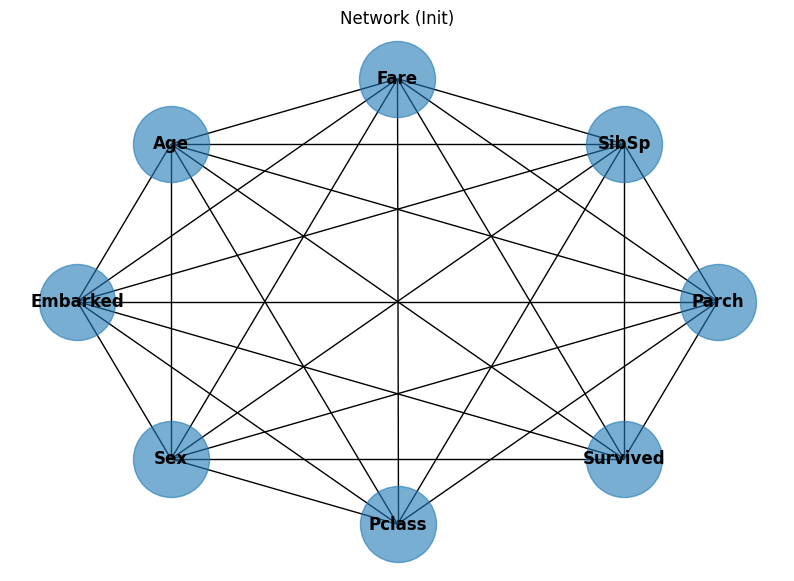

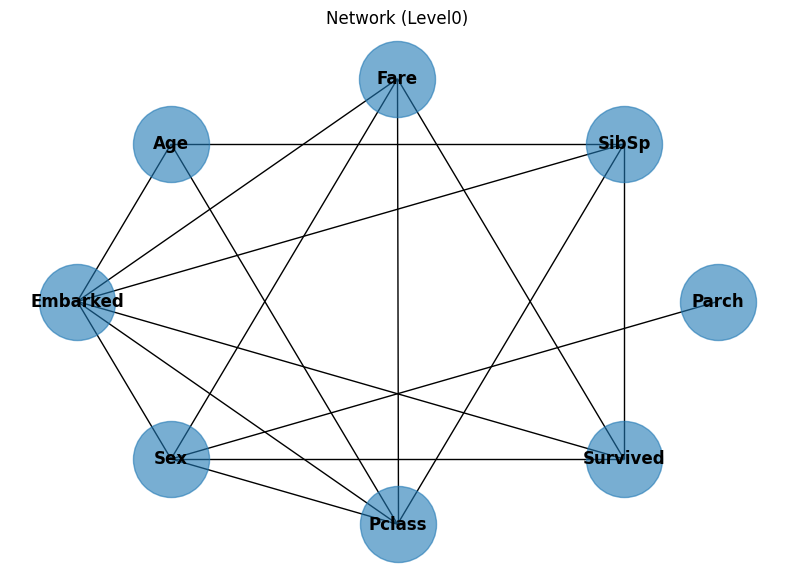

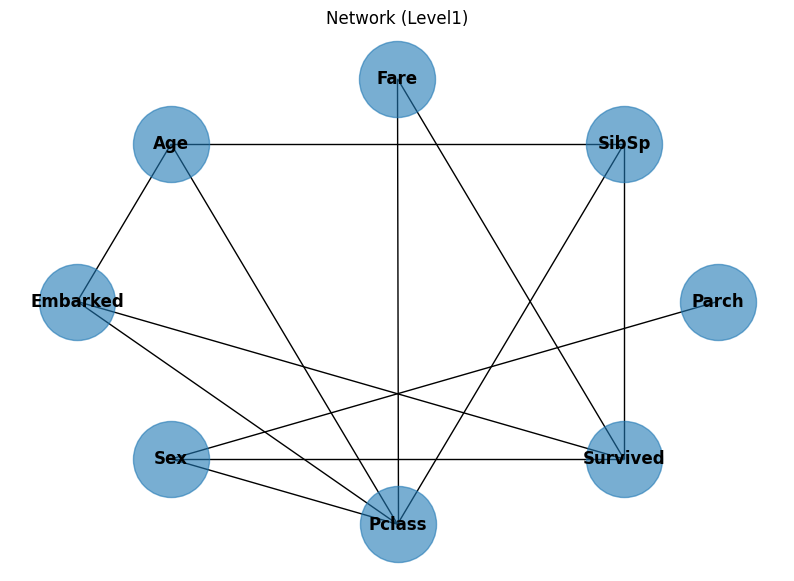

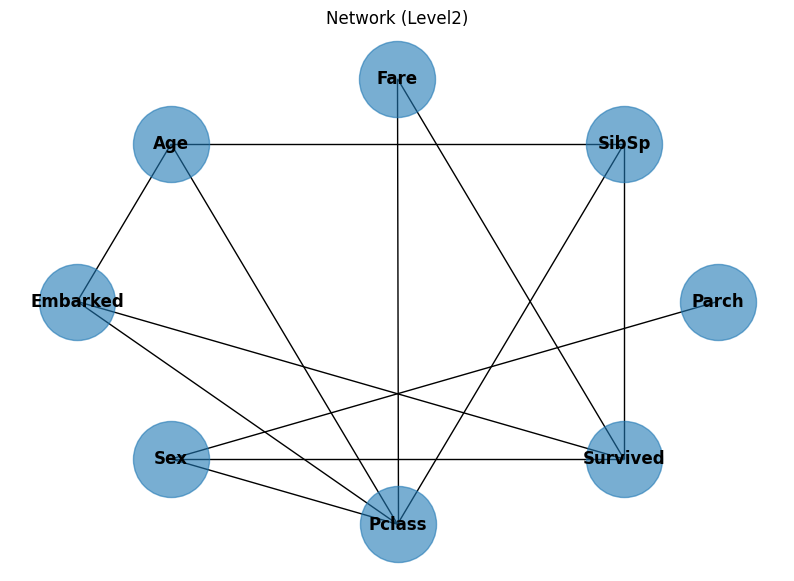

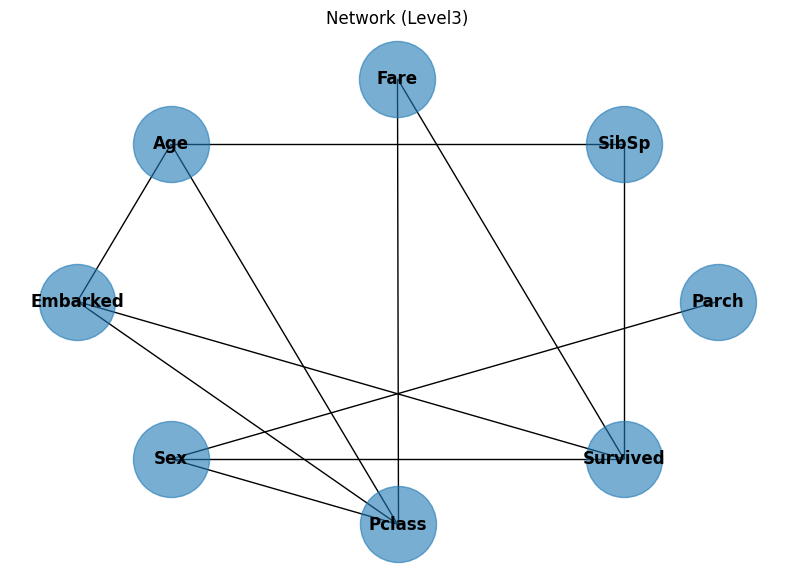

In [19]:
for label, connect_df in connect_df_dict.items():
    bayesian_network.visualize_connection(connect_df, f"Network ({label})")

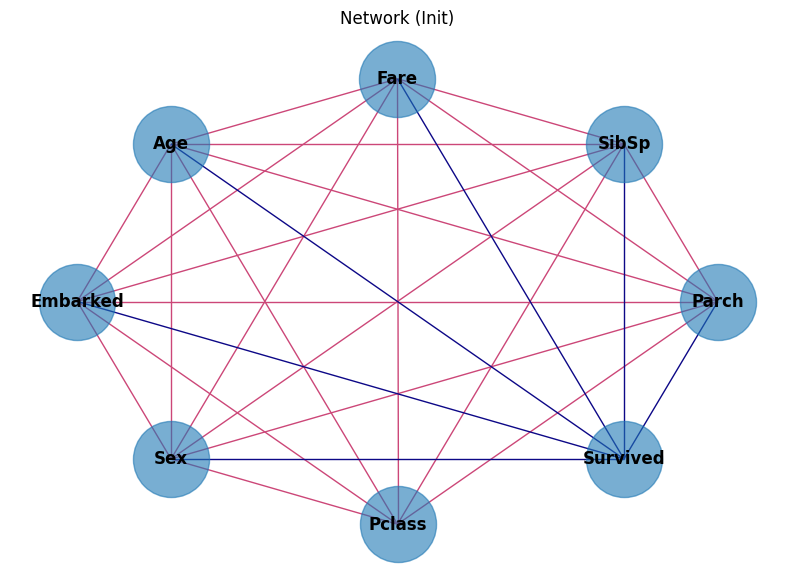

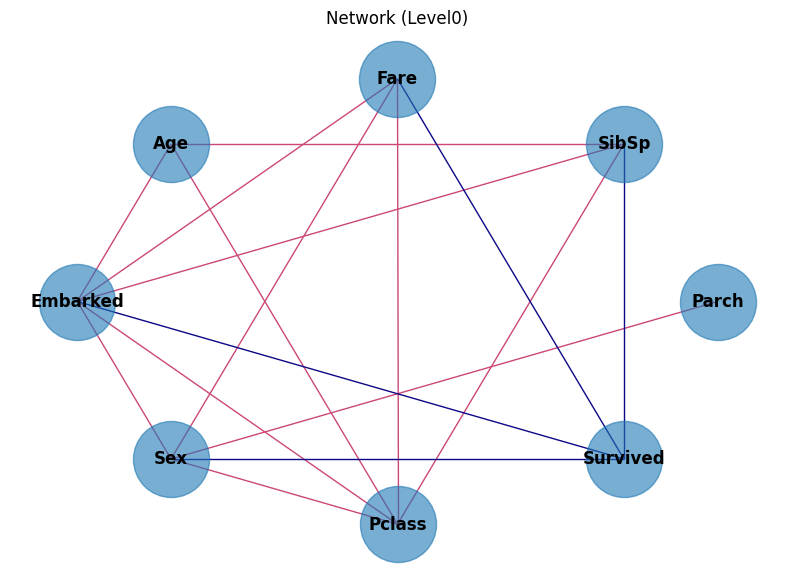

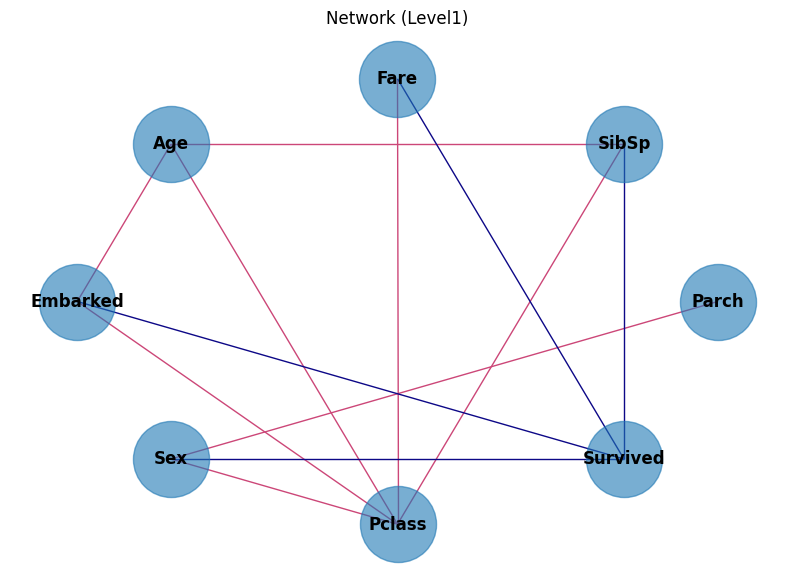

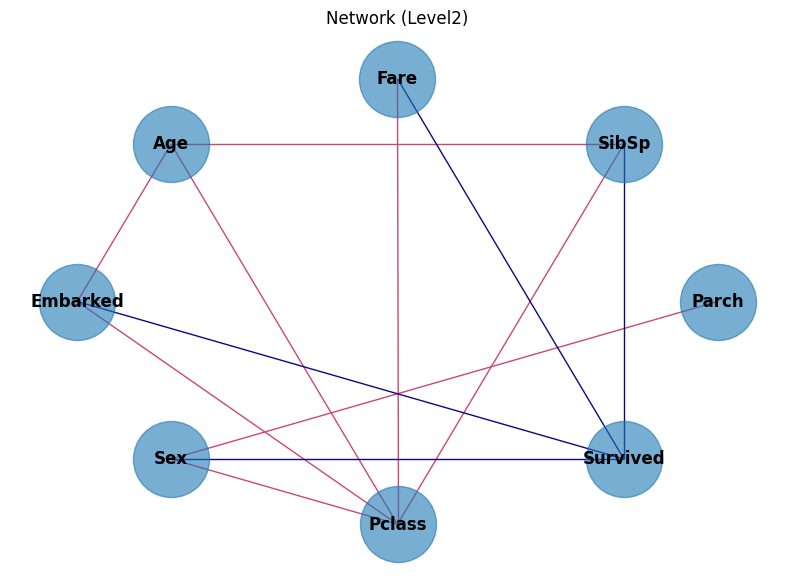

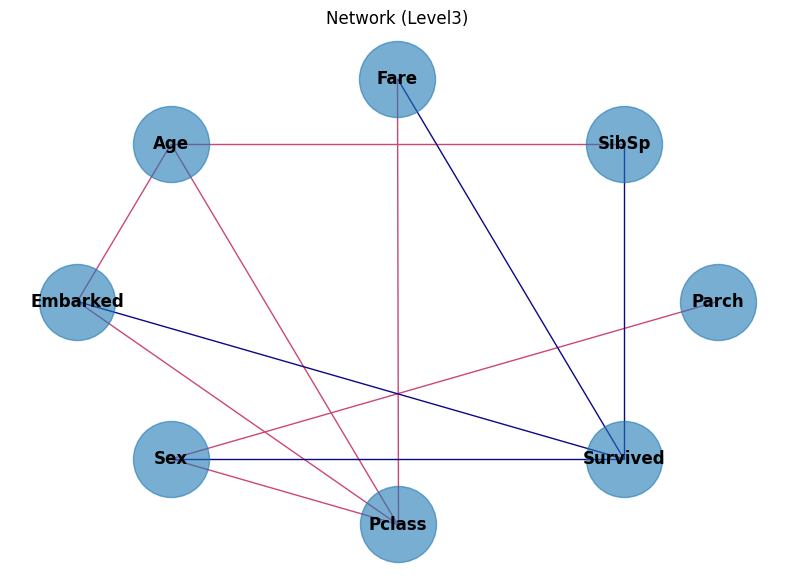

In [20]:
for label, closeness_df in closeness_df_dict.items():
    bayesian_network.visualize_closeness(closeness_df, f"Network ({label})")

| 英語 | 日本語 |
|------|--------|
| Survived | 生存 |
| Pclass | チケットクラス |
| Name | 名前 |
| Sex | 性別 |
| Age | 年齢 |
| SibSp | 兄弟姉妹/配偶者の数 |
| Parch | 親/子供の数 |
| Ticket | チケット番号 |
| Fare | 運賃 |
| Embarked | 乗船した港 |